## Imports

In [1]:
# from class_source.idata_client import IData
from idmmonitor import IData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## API Code

In [2]:
# Variables to use
API_KEY = "58F2Z-RBUEV-6AJ4T-SL3IC"
print(API_KEY)

# initialise
idata = IData()
# echo request information on
#idata.set_verbose(True)

#Store the API Key in the package
idata.set_api_key(API_KEY)


result = idata.get_user_favorites()
if (result is None):
    print("Could not get the user datasources. Check terminal for errors.")
else:
    print(result)

print('')
print("End...")

58F2Z-RBUEV-6AJ4T-SL3IC

{'Metadata': {'Datasets': 14, 'Updated': '2021-12-04T12:59:13Z', 'TimeStamp': 2459553.04112, 'Page': 1, 'PageCount': 1, 'Rows': 14}, 'Datasets': [{'Datasource': 'ECBFX', 'Symbol': 'EURINR', 'Name': 'ECB - Euro vs Indian Rupee', 'Description': 'European Central Bank exchange rate for Euro vs Indian Rupee (EUR/INR)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'], 'BateIndex': [0], 'StartDate': '2009-01-02', 'EndDate': '2021-12-05', 'Values': 3356, 'Corrections': 0, 'Premium': False, 'Favorite': True, 'IsCategoryDS': False, 'Subscription': 'Active', 'Logo': 'http://adm-gui.intdatamedia.com/datasources/ECBLA.png', 'Status': 200, 'Details': 'OK'}, {'Datasource': 'ECBFX', 'Symbol': 'EURISK', 'Name': 'ECB - Euro vs Icelandic Krona', 'Description': 'European Central Bank exchange rate for Euro vs Icelandic Krona (EUR/ISK)', 'Frequency': 'Day', 'Currency': None, 'Unit': None, 'Decimals': None, 'Bates': ['Close'], 'BateIndex': [

## Get_User_Favorites()

In [3]:
result_1 = idata.get_dataset_values_rc([{"Datasource":"ECBFX","Symbol":"EURGBP"},{"Datasource":"ECBFX","Symbol":"EURUSD"}])


-----------------------------------
POST
URL: 
https://api.idatamedia.org/
API: 
GetValuesRC
Payload: 
{'SessionToken': '90a8e4fd350925d5e797a43ce8038459', 'Series': [{'Datasource': 'ECBFX', 'Symbol': 'EURGBP'}, {'Datasource': 'ECBFX', 'Symbol': 'EURUSD'}], 'StartDate': 'Earliest', 'EndDate': 'Latest', 'Periods': 0, 'CommonStart': 'false', 'CommonEnd': 'false', 'CommonUA': 'true', 'DateFormat': 'YYYY-MM-DD', 'DateOrder': 'asc', 'Prefill': 'false', 'Fill': 'false', 'Frequency': 'd', 'Postfill': 'false', 'Rounding': 'auto', 'ReturnMetadata': 'false', 'ReturnAccess': 'false', 'ReturnParameters': 'false'}



In [4]:
def get_daily_data(dictionary):

    columns = dictionary['Columns']
    rows = dictionary['Rows']
    corrections = dictionary['Corrections']
    df = pd.DataFrame(rows.values(), columns = [columns[0]['Name'], columns[1]['Name']], index = rows.keys())
    df = df.reset_index()
    df.rename(columns = {'index':'Date'}, inplace = True)
    df.dropna(axis = 0, inplace = True)
    df["Date"] = pd.to_datetime(df['Date'])
    df.insert(1, 'Year', df.Date.dt.year)
    df.insert(2, 'Month', df.Date.dt.month)

    return df

def get_averages(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    theList_upd = {i+1:word for i,word in enumerate(theList)}

    df = df.groupby(['Year', 'Month'], as_index= False).agg({"ECB - Euro vs Pound Sterling": np.mean, "ECB - Euro vs US Dollar":np.mean})
    df['Month'] = df['Month'].replace(theList_upd)
    df.rename(columns = {"ECB - Euro vs Pound Sterling": "ECB - Euro vs Pound Sterling Mean", "ECB - Euro vs US Dollar": "ECB - Euro vs US Dollar Mean"}, inplace = True)
    return df

def get_processed(df):
    theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    eurgbp = df.iloc[:, :-1]
    eurusd = df.drop(columns = ['ECB - Euro vs Pound Sterling Mean'], axis = 1)
    datas = [eurgbp, eurusd]
    for num, data in enumerate(datas):    
        temp = []
        for i in range(0, len(data), 12):
            lists = data.iloc[i:i+12, -1].values.tolist()
            temp.append(lists)
        datas[num] = pd.DataFrame(temp, columns = theList, index = data.Year.unique().tolist()).round(3)
    datas = tuple(datas)
    
    return datas

In [5]:
dataframe = get_daily_data(result_1)
dataframe.head()

,Date,Year,Month,ECB - Euro vs Pound Sterling,ECB - Euro vs US Dollar
0,1999-01-04,1999,1,0.71110,1.1789
1,1999-01-05,1999,1,0.71220,1.1790
2,1999-01-06,1999,1,0.70760,1.1743
3,1999-01-07,1999,1,0.70585,1.1632
4,1999-01-08,1999,1,0.70940,1.1659


In [6]:
dataframe_2 = get_averages(dataframe)
dataframe_2.head(5)

,Year,Month,ECB - Euro vs Pound Sterling Mean,ECB - Euro vs US Dollar Mean
0,1999,Jan,0.702912,1.160780
1,1999,Feb,0.688505,1.120765
2,1999,Mar,0.671270,1.088296
3,1999,Apr,0.665018,1.070441
4,1999,May,0.658252,1.062810


In [7]:
eurgbp, eurusd = get_processed(dataframe_2)

In [8]:
dataframe.to_excel('Daily Data.xlsx')
dataframe_2.to_excel('Monthly Average.xlsx')
eurgbp.to_excel('ECB - Euro vs Pound Sterling Mean.xlsx')
eurusd.to_excel('ECB - Euro vs US Dollar Mean.xlsx')

## Data Visualization

In [9]:
eurgbp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,0.703,0.689,0.671,0.665,0.658,0.650,0.658,0.660,0.647,0.646,0.637,0.627
2000,0.618,0.615,0.611,0.598,0.602,0.629,0.623,0.607,0.608,0.589,0.600,0.613
2001,0.635,0.634,0.629,0.622,0.613,0.609,0.609,0.627,0.623,0.624,0.618,0.620
2002,0.617,0.612,0.616,0.614,0.628,0.644,0.639,0.636,0.631,0.630,0.637,0.642
2003,0.657,0.670,0.683,0.689,0.713,0.702,0.700,0.699,0.697,0.698,0.693,0.702


In [10]:
eurusd.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,1.161,1.121,1.088,1.070,1.063,1.038,1.035,1.060,1.050,1.071,1.034,1.011
2000,1.014,0.983,0.964,0.947,0.906,0.949,0.940,0.904,0.872,0.855,0.856,0.897
2001,0.938,0.922,0.910,0.892,0.874,0.853,0.861,0.900,0.911,0.906,0.888,0.892
2002,0.883,0.870,0.876,0.886,0.917,0.955,0.992,0.978,0.981,0.981,1.001,1.018
2003,1.062,1.077,1.081,1.085,1.158,1.166,1.137,1.114,1.122,1.169,1.170,1.229


In [11]:
def ellaboration(df, tittle, tittle_name = None):

    if tittle_name == None:
        columns = pd.MultiIndex.from_product([[f'{tittle}'], list(df)[:]])
    else:
        tittle = list(tittle)
        tittle[0] = list(tittle[0])
        tittle[1] = list(tittle[1])
        tittle_name = list(tittle_name)
        columns = pd.MultiIndex.from_product(tittle)

    df = pd.DataFrame(df.values.tolist(), index = df.index, columns = columns)

    return df

def styling(df, head = False):
    styles = [dict(selector="th", props=[('text-align', 'center'),
                                ('font-family', 'Calibri'),
                                ("border", "2px solid #d3d3d3"),
                                ("padding", "12px 25px"),
                                ("background-color", '#EDEFF1'),
                                ("font-weight", 'normal'),
                                ("font-size", "15px")
                                # ("border-collapse", "collapse"),
                                # ("text-transform", "uppercase"),
#                                 ("font-size", "18px")
                                ]) ,
            dict(selector = 'td', props=[('text-align', 'right'), 
                                    ("border", "2px solid #d3d3d3"),
                                    ("background-color", ['#FFFFFF', '#F9F9F9']),
                                    ('font-family', "Calibri"),
                                    ("font-size", "15px")])
            ]
    if head:
        df = df.iloc[:5, :]
    
    df = df.style.set_precision(3)
    df.set_table_styles(styles)
    
    return df

## Better Visualization

In [12]:
eurgbp_n = styling(ellaboration(eurgbp, "ECB - Euro vs Pound Sterling Mean"), True)
eurgbp_n.to_excel('EURGBP.xlsx', engine='openpyxl')
eurgbp_n

In [13]:
eurusd_n = styling(ellaboration(eurusd, "ECB - Euro vs US Dollar Mean"), True)
eurusd_n.to_excel('EURUSD.xlsx', engine='openpyxl')
eurusd_n

### First

### Second

In [14]:
eurgbp_eurusd = pd.DataFrame()
for i in range(len(list(eurgbp))):
    eurgbp_eurusd = pd.concat([eurgbp_eurusd, eurgbp.iloc[:, i], eurusd.iloc[:, i]], axis = 1)

theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sub_cols = ['EUR-GBP', 'EUR-USD']
tittle = tuple([tuple(theList), tuple(sub_cols)])
tittle_name = tuple(['Month:', 'Contract:'])
second = ellaboration(eurgbp_eurusd, tittle, tittle_name)
second.head()

Jan             Feb             Mar             Apr             May  \
     EUR-GBP EUR-USD EUR-GBP EUR-USD EUR-GBP EUR-USD EUR-GBP EUR-USD EUR-GBP   
1999   0.703   1.161   0.689   1.121   0.671   1.088   0.665   1.070   0.658   
2000   0.618   1.014   0.615   0.983   0.611   0.964   0.598   0.947   0.602   
2001   0.635   0.938   0.634   0.922   0.629   0.910   0.622   0.892   0.613   
2002   0.617   0.883   0.612   0.870   0.616   0.876   0.614   0.886   0.628   
2003   0.657   1.062   0.670   1.077   0.683   1.081   0.689   1.085   0.713   

              ...     Aug             Sep             Oct             Nov  \
     EUR-USD  ... EUR-GBP EUR-USD EUR-GBP EUR-USD EUR-GBP EUR-USD EUR-GBP   
1999   1.063  ...   0.660   1.060   0.647   1.050   0.646   1.071   0.637   
2000   0.906  ...   0.607   0.904   0.608   0.872   0.589   0.855   0.600   
2001   0.874  ...   0.627   0.900   0.623   0.911   0.624   0.906   0.618   
2002   0.917  ...   0.636   0.978   0.631   0.981   0.630   0.981   0.637   
2003   1.158  ...   0.699   1.114   0.697   1.122   0.698   1.169   0.693   

                 Dec          
     EUR-USD EUR-GBP EUR-USD  
1999   1.034   0.627   1.011  
2000   0.856   0.613   0.897  
2001   0.888   0.620   0.892  
2002   1.001   0.642   1.018  
2003   1.170   0.702   1.229  

[5 rows x 24 columns]

In [15]:
second = styling(second)
second.to_excel('EUR-GBP-USD_2.xlsx', engine='openpyxl')
second

## Line Plot

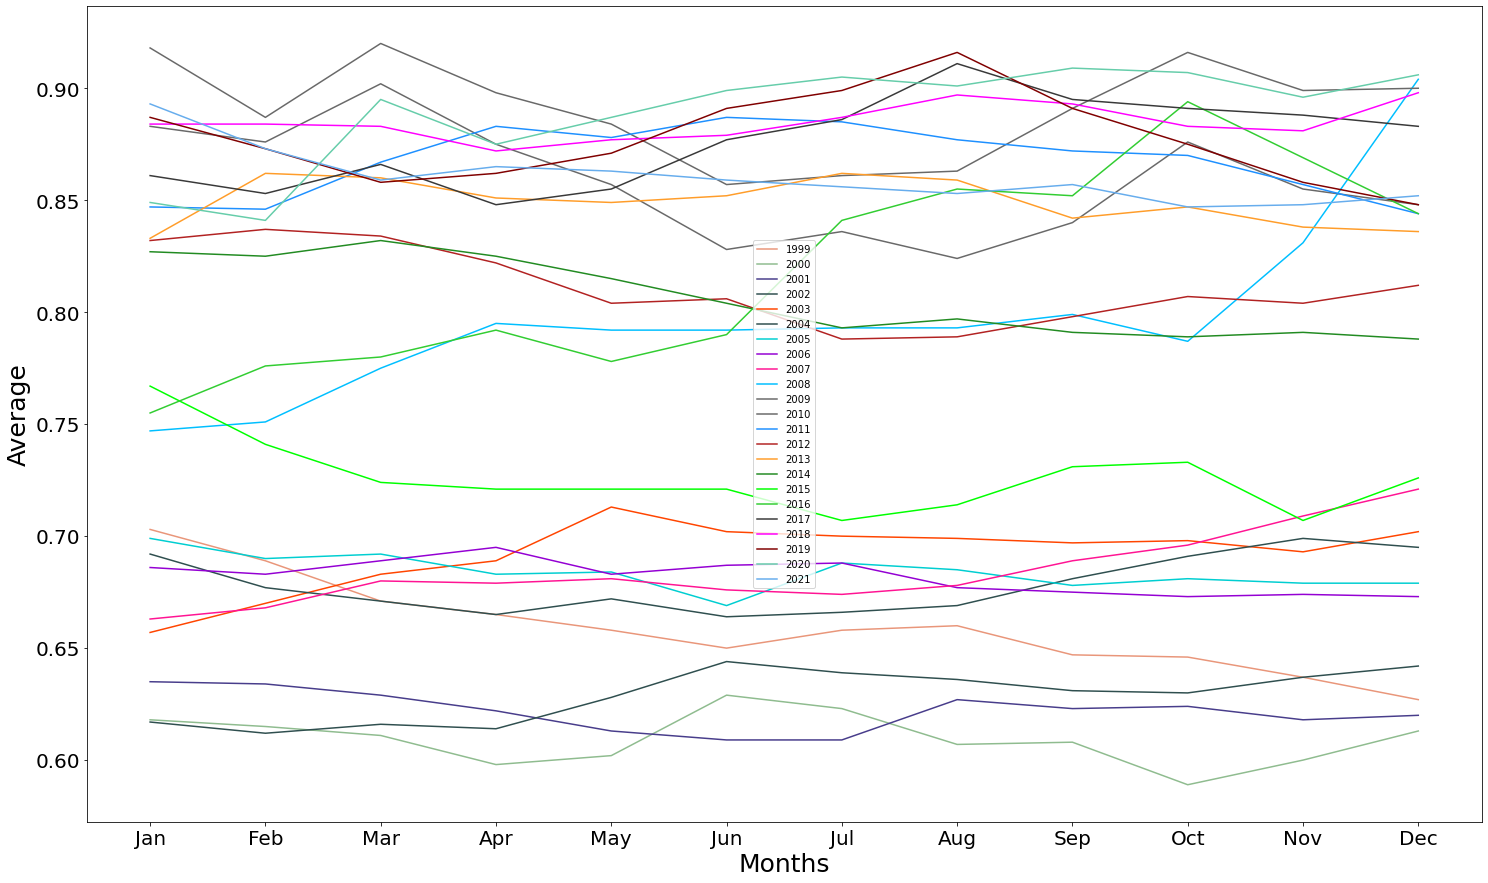

In [16]:
colors = ["#E9967A", "#8FBC8F", "#483D8B", "#2F4F4F", "#FF4500", "#2F4F4F", "#00CED1", "#9400D3", "#FF1493", "#00BFFF", "#696969", "#696969", "#1E90FF", "#B22222", "#ff9d2a", "#228B22", "#00FF00", '#32CD32', '#393939', '#FF00FF', '#800000', '#66CDAA', '#67aded']
plt.figure(figsize = (25, 15))
# EUR-GBP
for i, value in enumerate(eurgbp.values.tolist()):
    plt.plot(theList, value, color = colors[i])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Average', fontsize = 25)
plt.legend(eurgbp.index.tolist(), loc = 'best')
plt.show()

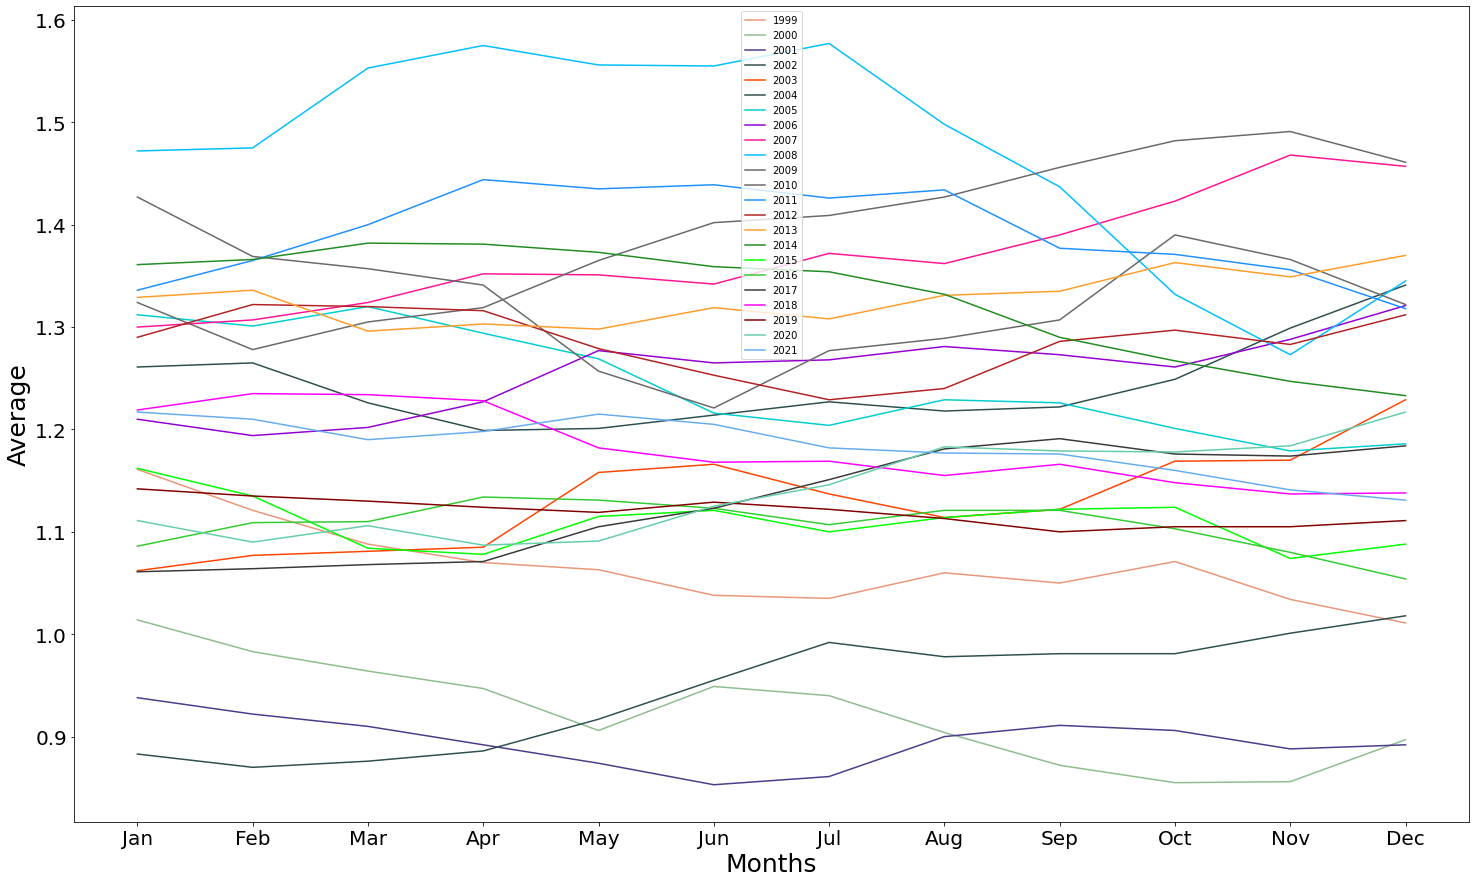

In [17]:
plt.figure(figsize = (25, 15))
# EUR-USD
for i, value in enumerate(eurusd.values.tolist()):
    plt.plot(theList, value, color = colors[i])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Average', fontsize = 25)
plt.legend(eurusd.index.tolist(), loc = 'best')
plt.show()